225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.4464 - loss: 1.4003
Test Loss: 1.2603284120559692
Test Accuracy: 0.5183895230293274
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.44      0.39      0.41       958
     disgust       0.00      0.00      0.00       111
        fear       0.37      0.21      0.27      1024
       happy       0.63      0.82      0.71      1774
     neutral       0.48      0.49      0.49      1233
         sad       0.39      0.39      0.39      1247
    surprise       0.65      0.71      0.68       831

    accuracy                           0.52      7178
   macro avg       0.42      0.43      0.42      7178
weighted avg       0.49      0.52      0.50      7178



c:\Users\hizkia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hizkia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hizkia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

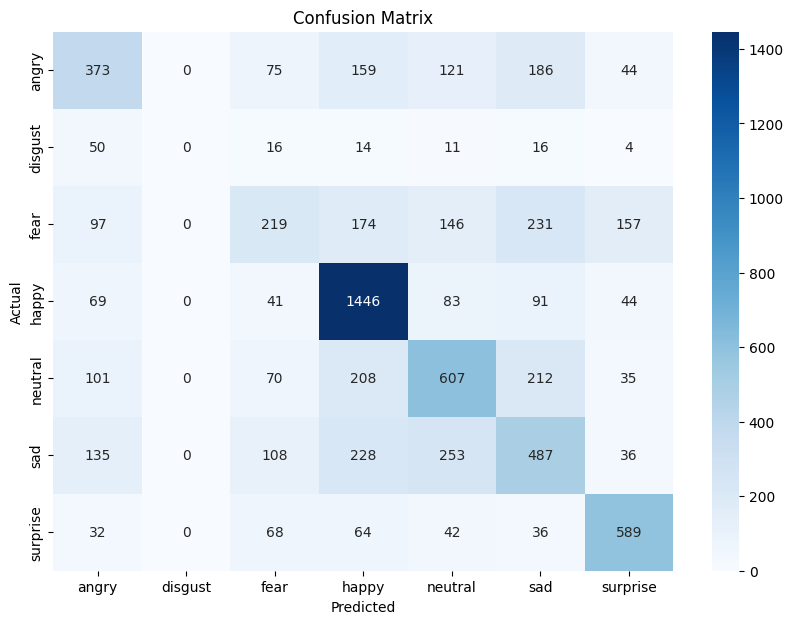

In [7]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# Path ke folder data
data_dir = 'data'
emotion_labels = os.listdir(os.path.join(data_dir, 'train'))

# Ukuran gambar
IMG_SIZE = 48

# Fungsi untuk memuat gambar (sama seperti di preprocessing.py)
def load_data(folder):
    images = []
    labels = []
    for label_idx, emotion in enumerate(emotion_labels):
        emotion_folder = os.path.join(folder, emotion)
        for file in os.listdir(emotion_folder):
            img_path = os.path.join(emotion_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img)
                labels.append(label_idx)
    return np.array(images), np.array(labels)

# Load data test
X_test, y_test = load_data(os.path.join(data_dir, 'test'))

# Normalisasi gambar ke rentang [0, 1]
X_test = X_test / 255.0

# Tambahkan channel dimension (grayscale)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# One-hot encoding untuk label
y_test_cat = to_categorical(y_test, num_classes=len(emotion_labels))

# Memuat model yang sudah dilatih
model = load_model('models/emotion_model.h5')

# Evaluasi model pada data test
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Prediksi pada data test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=emotion_labels))

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
